In [95]:
%load_ext autoreload
%autoreload 2

# Imports
import pandas as pd

from scenario import LoanScenario

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
# Initial variables

# Constant
vars = ["L", "B"]  # Variables to plot the output for

# Set start year and end year
start_year = 2023
end_year = 2025

L0 = 10_000  # Start Loan (L) amount
B0 = 5_000  # Start (combined) Balance (B) (overall balance on on your bank accounts)

# R: Yearly interest Rate (R) (in %)
R_dict = {"2023-01-01": 0.46, "2024-01-01": 2.56}

# BC: Monthly Balance Change (BC) (Income-Expenses)
BC_dict = {
    "2023-01-01": -300,  # e.g. Studying
    "2024-01-01": 100,  # e.g. started working
}

# Scenario 1
# LC: Change of the Loan in this period: how much you are adding/repaying per month
LC_dict = {}

s1 = LoanScenario(
    L0=L0,
    B0=B0,
    start_year=start_year,
    end_year=end_year,
    LC_dict=LC_dict,
    R_dict=R_dict,
    BC_dict=BC_dict,
)

# Scenario 2
LC_dict = {"2023-01-01": 500, "2024-01-01": 0}

s2 = LoanScenario(
    L0=L0,
    B0=B0,
    start_year=start_year,
    end_year=end_year,
    LC_dict=LC_dict,
    R_dict=R_dict,
    BC_dict=BC_dict,
)

scenarios = {"s1": s1, "s2": s2}

# Show dataframe before simulating
s1.df.head()

,Date,R,LC,BC,L,B
0,2023-01-01,0.46,0.0,-500.0,10000.0,5000.0
1,2023-02-01,0.46,0.0,-500.0,0.0,0.0
2,2023-03-01,0.46,0.0,-500.0,0.0,0.0
3,2023-04-01,0.46,0.0,-500.0,0.0,0.0
4,2023-05-01,0.46,0.0,-500.0,0.0,0.0


In [97]:
# Simulate
for s in scenarios.values():
    s.calculate()

# Combine the scenarios into 1 dataframe
results = {v: pd.DataFrame() for v in vars}

for s_name, s in scenarios.items():
    prefix = s_name

    for v in vars:
        results[v]["Date"] = s.df["Date"]
        results[v][f"{prefix}_{v}"] = s.df[v]

for v in vars:
    results[v].set_index("Date", inplace=True)

# Show dataframe after simulating
results["L"].head()

,s1_L,s2_L
Date,,
2023-01-01,10000.000000,10000.000000
2023-02-01,10003.895982,10504.090781
2023-03-01,10007.416238,11007.962994
2023-04-01,10011.315109,11512.446475
2023-05-01,10015.089656,12016.975506


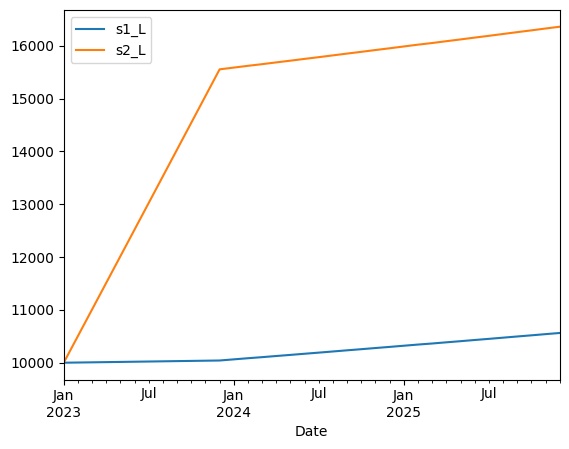

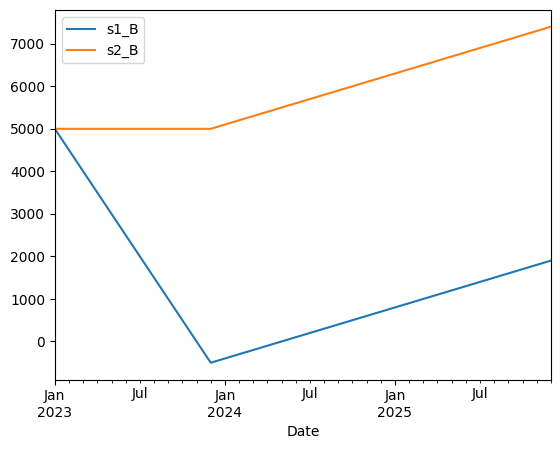

In [98]:
# Show output
for v in vars:
    results[v].plot.line()

In [99]:
# Print outcomes numerically
for v in vars:
    print(results[v].tail(1))
    print("\n")
    

                    s1_L          s2_L
Date                                  
2025-12-01  10563.156024  16361.863544


              s1_B    s2_B
Date                      
2025-12-01  1900.0  7400.0




In [100]:
# Show total interest for each scenario
total_interest = {s_name: s.get_total_interest() for s_name, s in scenarios.items()}

total_interest

{'s1': 563.1560237645044, 's2': 361.86354362471684}